In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
def get_df(file_str):
    mf = pd.read_csv(file_str)
    mf['t_diff'] = mf.t.diff()
    mf['success'] = (mf.r > 9000)*1.
    #print(mf.head())
    print(mf.describe())
    print("Mean Reward last 100 Episodes: {}".format(np.mean(mf.r.iloc[-100:])))
    print("Max reward values:")
    print(mf.r.sort_values(ascending=False)[0:10])
    print("Max l values:")
    print(mf.l.sort_values(ascending=False)[0:10])
    return mf

def get_scatter_plots(df):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.r,marker='.')
    plt.ylabel('reward')
    plt.xlabel('episode')
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.l,marker='.')
    plt.ylabel('timesteps per episode')
    plt.xlabel('episode')
    plt.show()
    
#     a4_dims = (11.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     plt.scatter(df.index,df.t_diff,marker='.')
#     plt.ylabel('time per episode')
#     plt.xlabel('episode')
#     plt.show()
    
#     a4_dims = (11.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     plt.scatter(df.index,df.success,marker='.')
#     plt.ylabel('success')
#     plt.xlabel('episode')
#     plt.show()
    

def get_rolling_plots(df):
    rolling_window_size = 100
    if len(df.r) < 1000:
        rolling_window_size = 50
        
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.r.rolling(rolling_window_size).mean())
    plt.ylabel('reward')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.l.rolling(rolling_window_size).mean())
    plt.ylabel('timesteps')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
#     a4_dims = (11.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     sns.tsplot(df.t_diff.rolling(rolling_window_size).mean())
#     plt.ylabel('time')
#     plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
#     plt.show()
    
#     a4_dims = (11.7, 8.27)
#     fig, ax = plt.subplots(figsize=a4_dims)
#     sns.tsplot(df.success.rolling(rolling_window_size).mean())
#     plt.ylabel('success')
#     plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
#     plt.show()
    

def get_results(lvl_array,monitor_str =''):
    for i in lvl_array:
        print(i)
        if monitor_str == '':
            file_str = '{}/monitor.csv'.format(i)
        else:
            file_str = '{}/monitor_{}.csv'.format(i,monitor_str)
        df = get_df(file_str)
        print(i)
        get_scatter_plots(df)
        print(i)
        get_rolling_plots(df)
        
def get_level_comparison(lvl_array):
    df_array = []
    for i in range(len(lvl_array)):
        file_str = '{}/monitor.csv'.format(lvl_array[i])
        df_array.append(pd.read_csv(file_str))
        df_array[i]['t_diff'] = df_array[i].t.diff()
        df_array[i]['success'] = (df_array[i].r > 9000)*1.
        print(lvl_array[i])
        print(df_array[i].describe())
        
    get_rolling_comparison(df_array,lvl_array)

    
def plot_rolling_mean(df,col_name,rolling_window_size=100):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df[col_name].rolling(rolling_window_size).mean())
    plt.ylabel(col_name)
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    
def get_rolling_comparison(df_array, lvl_array):
    rolling_window_size = 100
    if len(df_array[0]) < 1000:
        rolling_window_size = 50
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " reward")
        temp_index += 1
        plot_rolling_mean(i,'r',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " success")
        temp_index += 1
        plot_rolling_mean(i,'success',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " timesteps")
        temp_index += 1
        plot_rolling_mean(i,'l',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        a4_dims = (11.7, 8.27)
        fig, ax = plt.subplots(figsize=a4_dims)
        print(lvl_array[temp_index], " reward")
        plt.scatter(i.index,i.r,marker='.')
        plt.ylabel('reward')
        plt.xlabel('episode')
        plt.show()    
        temp_index += 1

logs
                 r             l             t       t_diff      success
count  1039.000000   1039.000000   1039.000000  1038.000000  1039.000000
mean   7968.824454  25054.034649  17440.910121    34.879146     0.063523
std     711.622944   5263.238790  10572.968065     6.341831     0.244018
min     626.730188  13131.000000     47.454966    17.106865     0.000000
25%    7716.374747  20845.500000   8051.222090    29.963362     0.000000
50%    7904.101779  23731.000000  17353.112186    34.346520     0.000000
75%    8204.473253  32000.000000  26495.341373    41.737048     0.000000
max    9726.574297  32000.000000  36252.008604    47.540292     1.000000
Mean Reward last 100 Episodes: 8275.657085049152
Max reward values:
279     9726.574297
903     9455.404656
404     9423.790664
901     9412.762379
985     9411.618368
764     9406.045919
307     9403.613188
1006    9383.722699
271     9353.433145
300     9348.314287
Name: r, dtype: float64
Max l values:
0      32000
273    32000
343   

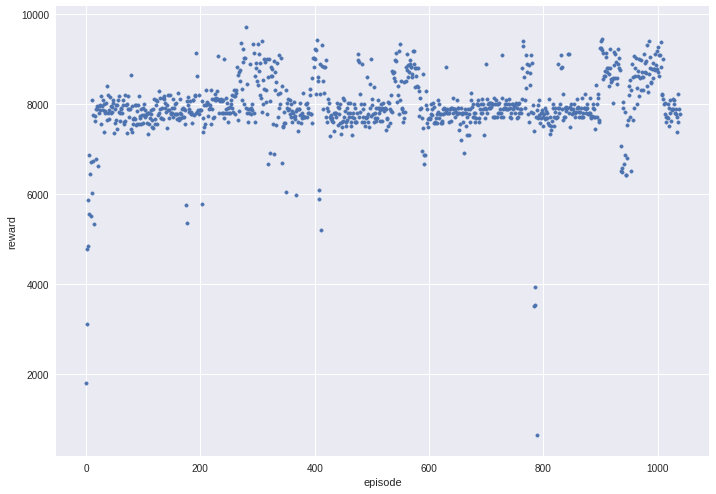

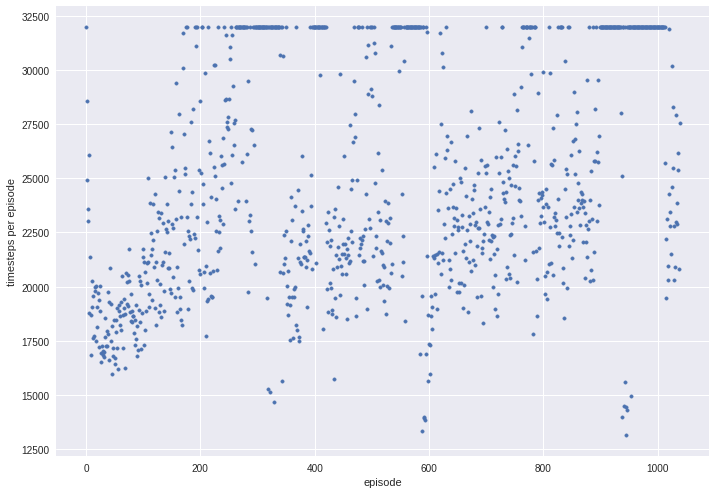

logs


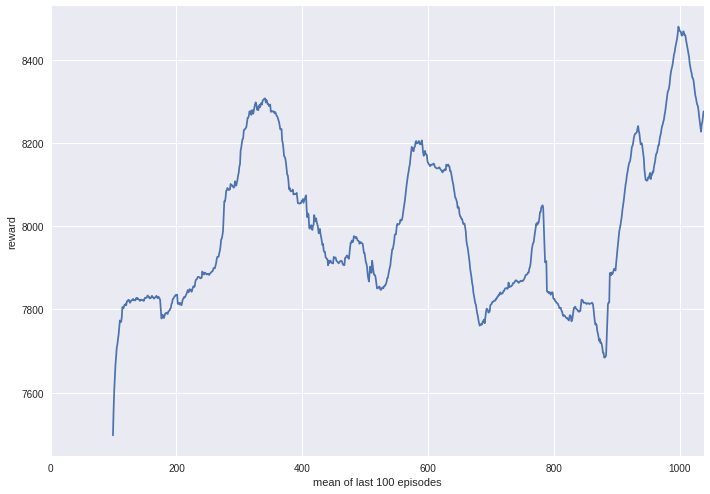

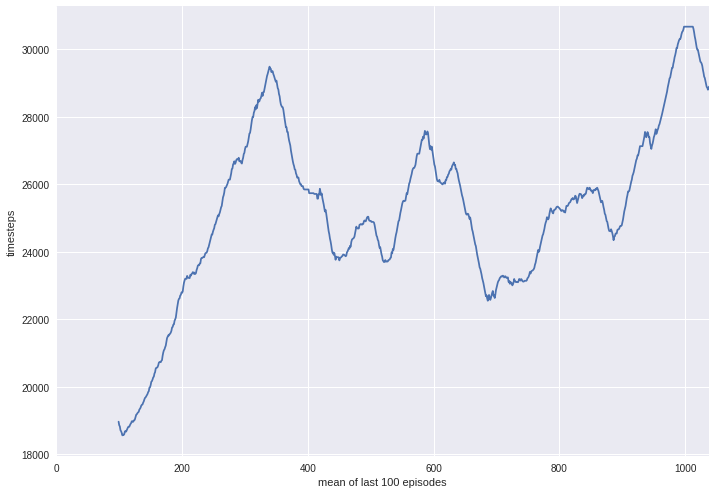

In [18]:
#/home/jim/projects/retroui/logs/log_1533533118.csv
#stops improving as becomes afraid to fight boss
best_run_array = [
    'logs'
]

get_results(best_run_array,'1533533118')

logs
                  r             l            t      t_diff     success
count    268.000000    268.000000   268.000000  267.000000  268.000000
mean   11379.995725  20051.115672  3715.072186   28.446930    0.992537
std      406.294824   2717.589706  2178.004809    4.129028    0.086225
min     6376.017436  15665.000000    44.469409   21.970755    0.000000
25%    11415.267228  17939.500000  1774.146467   25.105759    1.000000
50%    11431.414658  19491.000000  3736.953054   27.768615    1.000000
75%    11452.511179  21732.000000  5499.011922   31.131930    1.000000
max    11550.900561  32000.000000  7639.799663   45.013857    1.000000
Mean Reward last 100 Episodes: 11433.484810686112
Max values:
42     11550.900561
116    11532.243502
121    11527.252538
132    11526.134892
54     11525.862082
115    11522.885106
70     11522.082542
58     11521.082290
31     11516.284481
53     11515.598518
Name: r, dtype: float64
logs


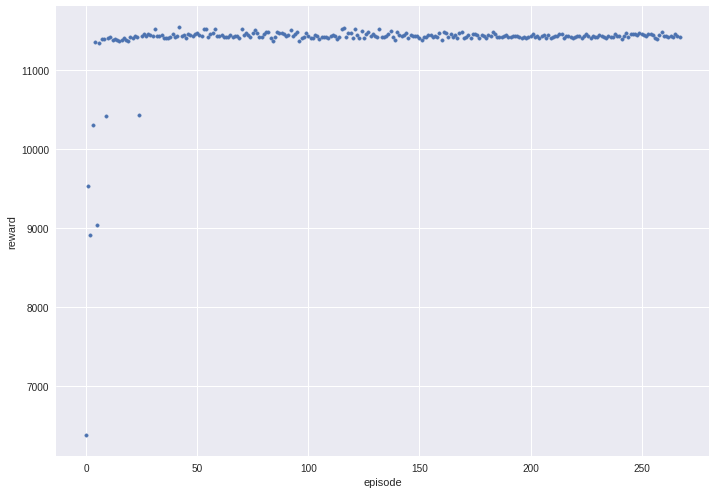

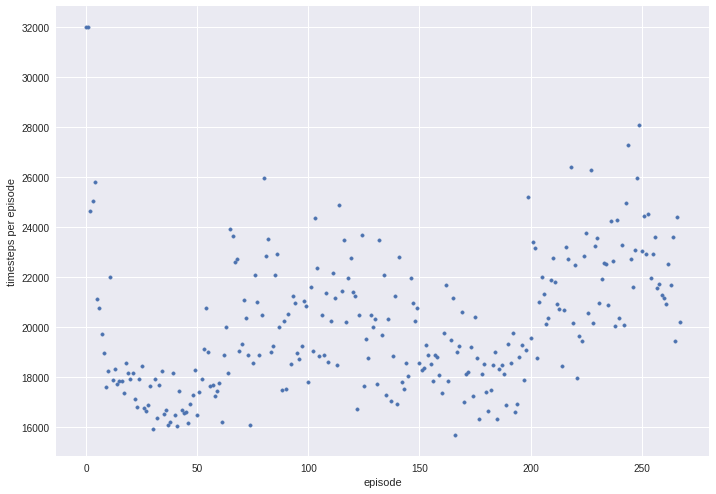

logs


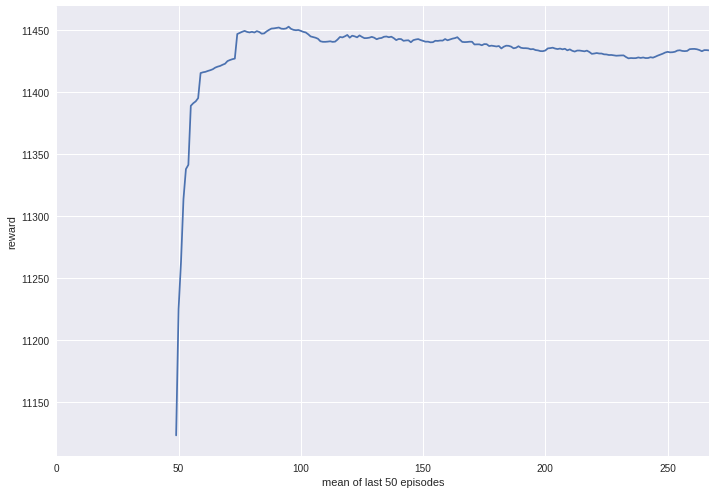

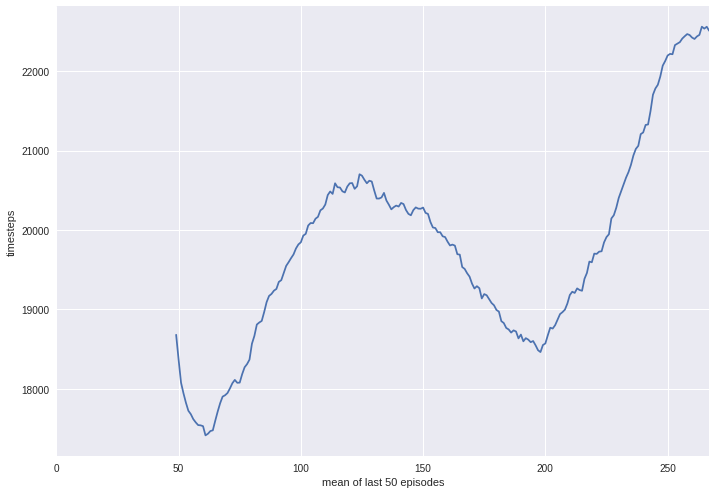

In [10]:
#successful runs but no death penalty
#/home/jim/projects/retroui/logs/log_1533524487.csv
best_run_array = [
    'logs'
]

get_results(best_run_array,'1533524487')

logs
                 r            l            t       t_diff  success
count  3184.000000  3184.000000  3184.000000  3183.000000   3184.0
mean   3160.463713   860.516018  1711.317101     1.193605      0.0
std    1733.281785   424.326901  1022.874368     0.601282      0.0
min      25.770826   289.000000     1.784388     0.395394      0.0
25%    1943.905113   564.000000   860.213474     0.754730      0.0
50%    2146.064675   678.500000  1615.144844     0.964754      0.0
75%    3996.373128  1063.250000  2506.410617     1.508936      0.0
max    8793.915985  6101.000000  3801.029927     8.365963      0.0
Mean Reward last 100 Episodes: 5438.2364016063975
Max values:
2629    8793.915985
3179    7548.756406
3160    7503.286463
3178    7465.539147
3165    7414.707415
3173    7329.443907
3159    7298.947153
2826    7241.086047
3170    7220.927769
3137    7217.318650
Name: r, dtype: float64
logs


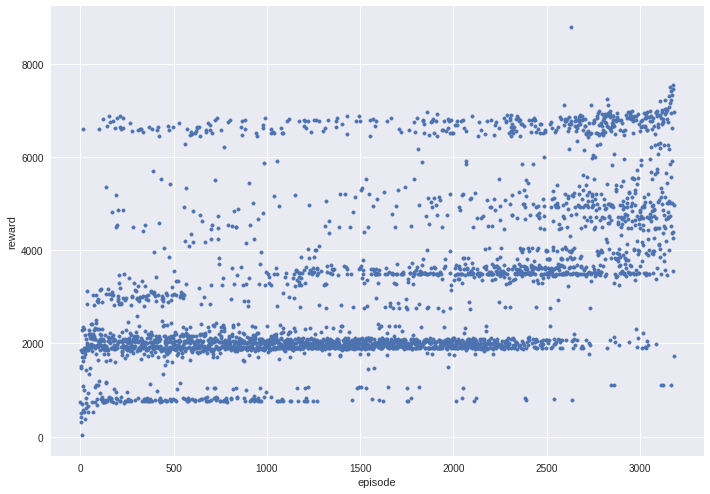

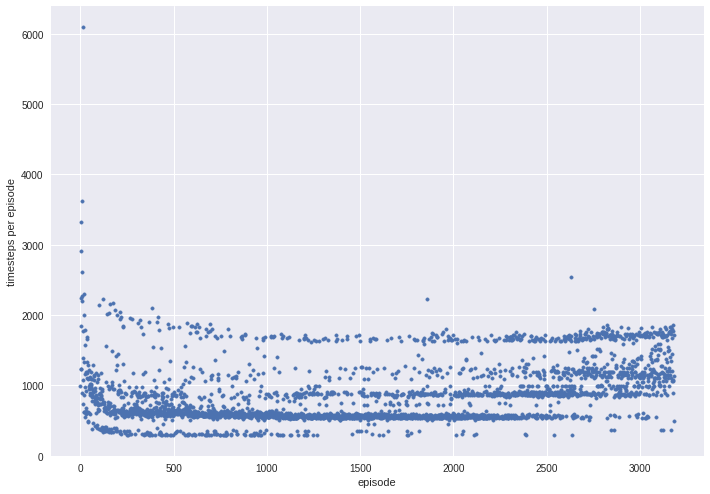

logs


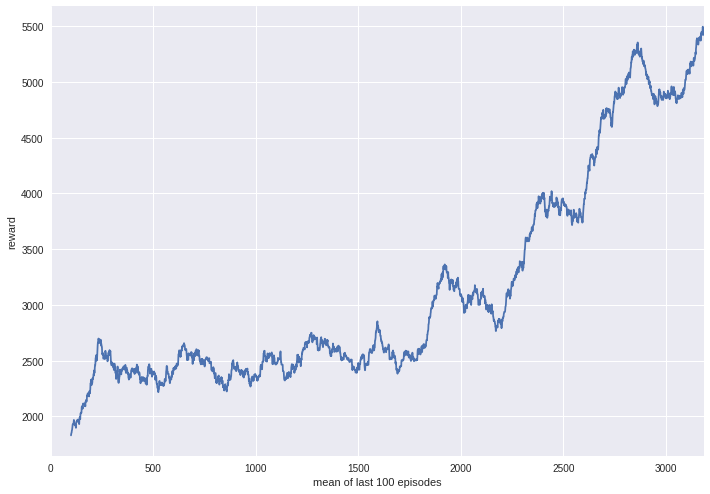

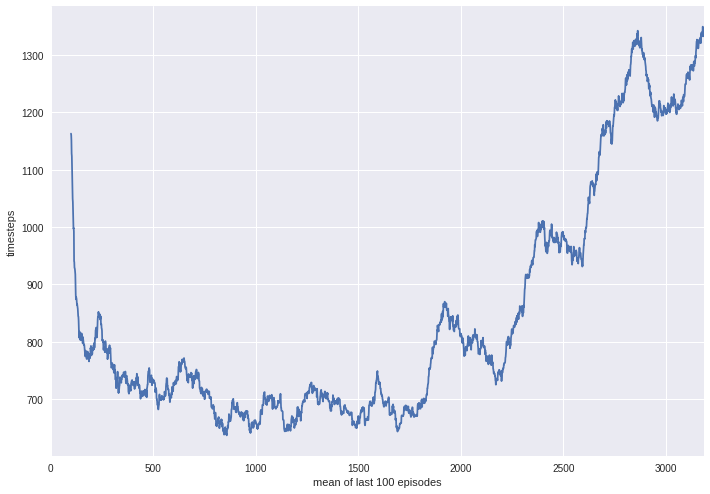

In [9]:
#1533355992
best_run_array = [
    'logs'
]

get_results(best_run_array,'1533362292')

logs
                  r             l            t       t_diff      success
count   4278.000000   4278.000000  4278.000000  4277.000000  4278.000000
mean    5381.770788   1411.419589  2182.867913     1.886003     0.041374
std    14314.121319   3333.282887  1393.501774     4.298796     0.199178
min    -7993.438840    294.000000     5.460882     0.410366     0.000000
25%     2102.606689    592.000000  1092.671137     0.794430     0.000000
50%     2319.268032    644.000000  2049.940094     0.872382     0.000000
75%     3193.681792    855.750000  3121.402401     1.181970     0.000000
max    82662.146890  18000.000000  8071.895469    24.123820     1.000000
Mean Reward last 100 Episodes: 66209.17306904605
Max values:
4114    82662.146890
4118    82652.631347
4147    82632.662979
4127    82623.019414
4148    82615.040249
4146    82613.710489
4134    82613.045519
4156    82595.432737
4154    82595.165767
4130    82593.979979
Name: r, dtype: float64
logs


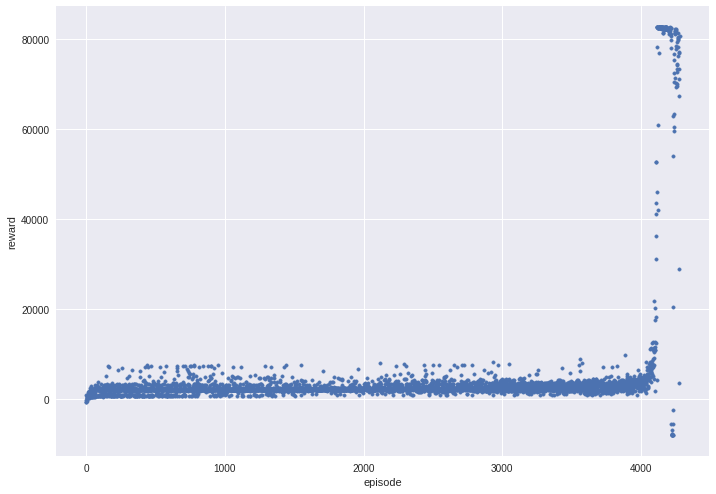

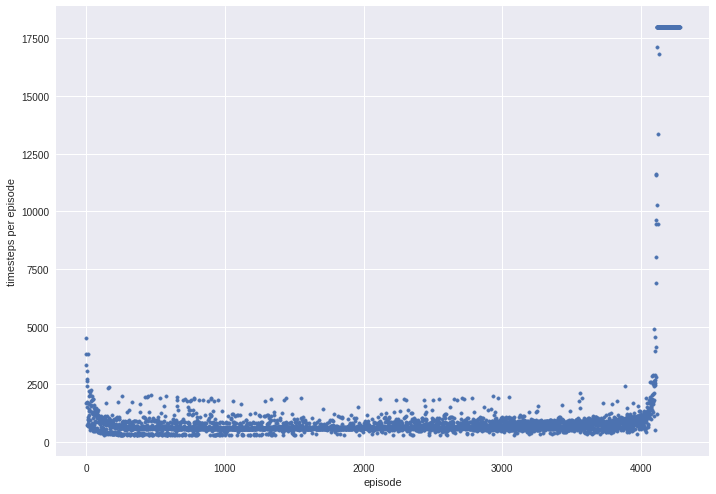

logs


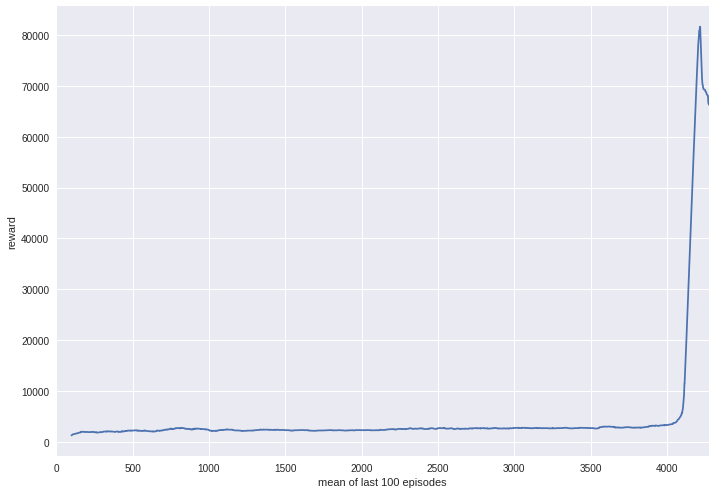

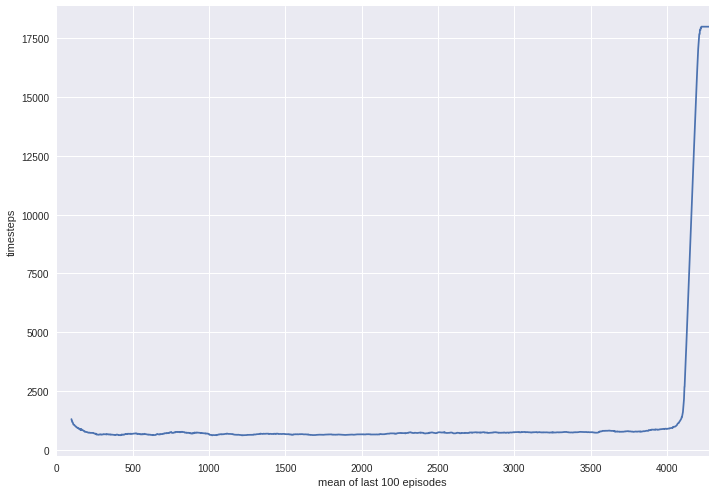

In [7]:
best_run_array = [
    'logs'
]

get_results(best_run_array,'1533347359')

logs
                  r             l            t       t_diff      success
count   1458.000000   1458.000000  1458.000000  1457.000000  1458.000000
mean    3376.459911    969.030864   875.292292     1.338880     0.019204
std     5944.078521   1327.050535   448.652804     1.770919     0.137290
min    -2407.793800    306.000000     5.689956     0.437891     0.000000
25%     2191.393064    638.000000   506.330837     0.867228     0.000000
50%     2500.222998    722.000000   879.747546     0.997817     0.000000
75%     3259.723203    938.000000  1241.364286     1.319259     0.000000
max    82643.602168  18000.000000  1956.438011    26.328800     1.000000
Mean Reward last 100 Episodes: 13413.05767769074
Max values:
1449    82643.602168
1455    82621.855195
1454    82361.153505
1457    82012.937276
1451    81705.095344
1441    62547.045308
1447    61593.863627
1452    55190.720480
1453    44111.573736
1438    39278.956248
Name: r, dtype: float64
logs


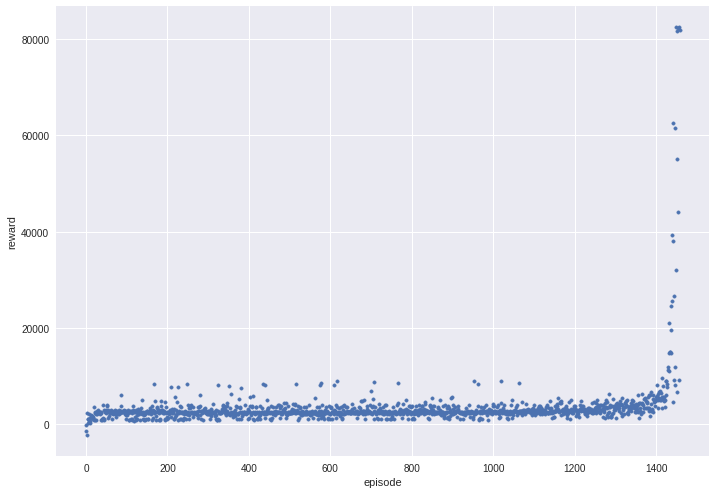

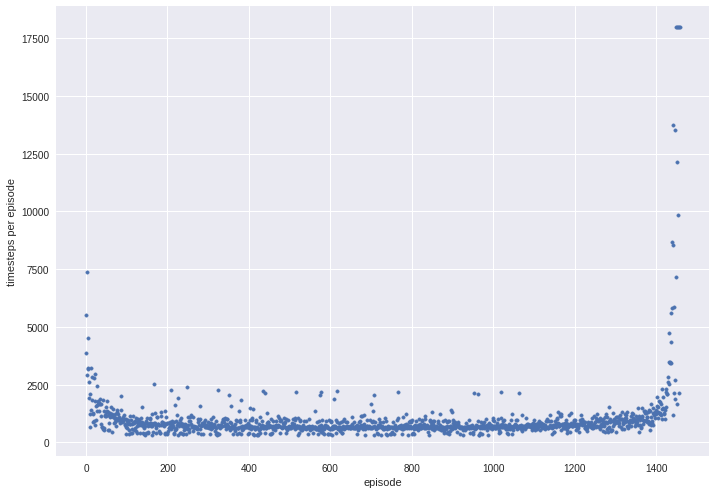

logs


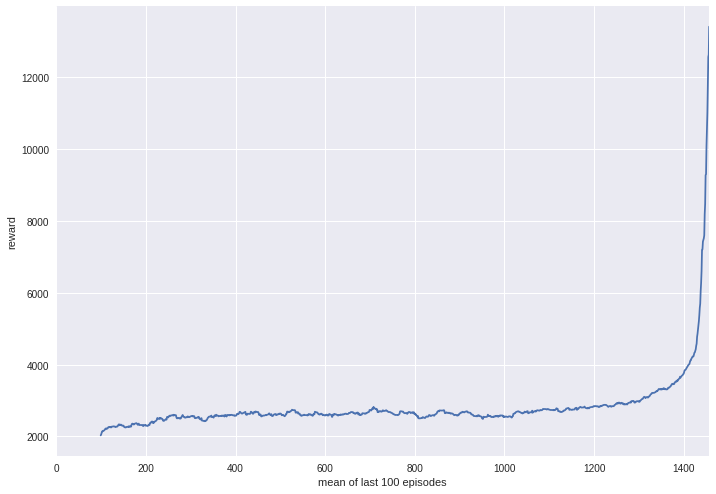

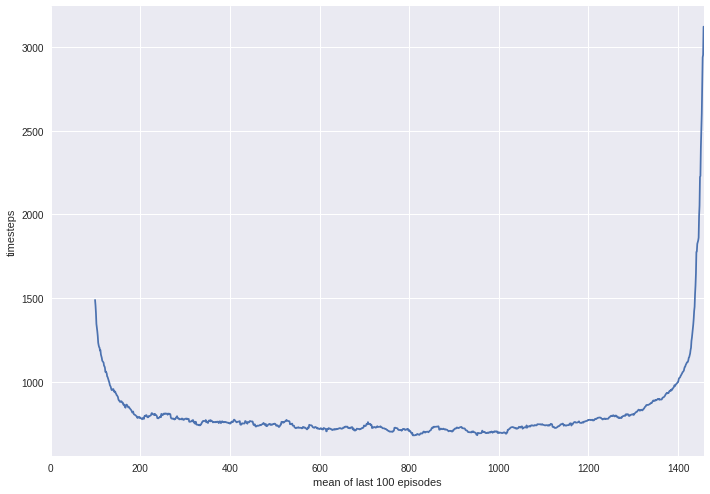

In [3]:
best_run_array = [
    'logs'
]

get_results(best_run_array,'1533345012')

